In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

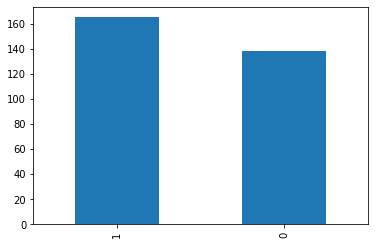

In [8]:
df.target.value_counts().plot(kind='bar')

In [9]:
x=df.iloc[:,:-1]
y=df['target']
print(x.shape,y.shape)

(303, 13) (303,)


In [10]:
featselector =SelectKBest(chi2,k=2)
featselector.fit(x,y)
print(featselector.scores_)
print(featselector.get_feature_names_out())
features= x[featselector.get_feature_names_out()]
features.head()
scaler= StandardScaler()
scaledx=scaler.fit_transform(features)

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['thalach' 'oldpeak']


In [11]:
xtrain , xtest , ytrain ,ytest =train_test_split(scaledx,y,test_size=0.2)
xtrain.shape

(242, 2)

In [12]:
clf=GaussianNB()
clf.fit(xtrain,ytrain)

GaussianNB()

In [13]:
ypred=clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 64  43]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67       107
           1       0.73      0.84      0.78       135

    accuracy                           0.74       242
   macro avg       0.74      0.72      0.72       242
weighted avg       0.74      0.74      0.73       242



In [14]:
import imblearn

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:ylabel='Purchased'>

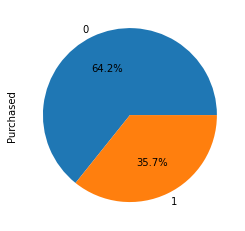

In [16]:
df.Purchased.value_counts().plot.pie(autopct="%.1f%%")

In [17]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [18]:
from imblearn.over_sampling import SMOTE,SMOTEN,SVMSMOTE

In [19]:
sm= [SMOTE(),SMOTEN(),SVMSMOTE()]
x1,y1 = sm[0].fit_resample(x,y)
x2,y2 = sm[1].fit_resample(x,y)
x3,y3 = sm[2].fit_resample(x,y)

NameError: name 'ix' is not defined

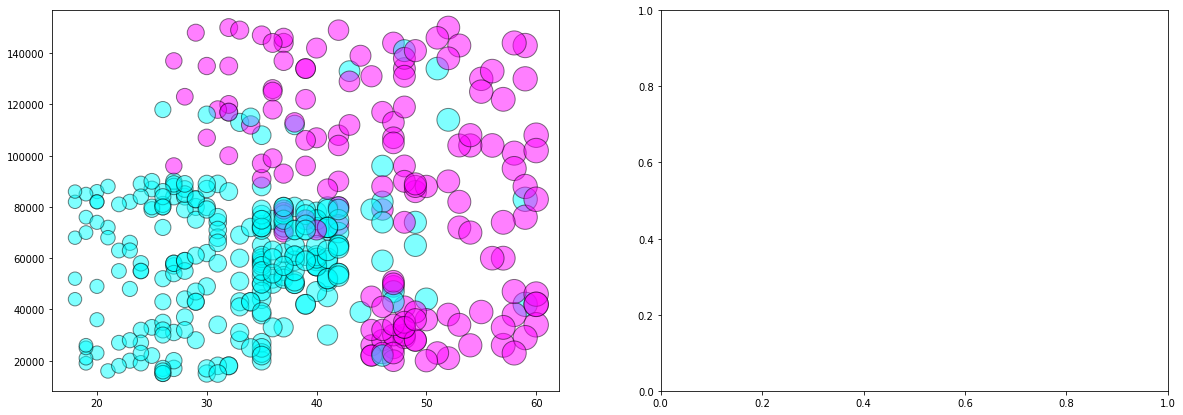

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].scatter(x.Age,x.EstimatedSalary,c=y,s=x.Age*10,cmap='cool',edgecolor='BLACK',alpha=0.5)
ax[1].scatter(ix.Age,ix.EstimatedSalary,c=iy ,s=ix.Age*10,cmap='cool',edgecolor='black',alpha=0.5)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest= train_test_split(scaledx,y,test_size=0.2)
m=LogisticRegression()
m.fit(xtrain,ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[47  3]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        50
           1       0.88      0.70      0.78        30

    accuracy                           0.85        80
   macro avg       0.86      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x1)
xtrain,xtest,ytrain,ytest= train_test_split(scaledx,y1,test_size=0.2)
m1=KNeighborsClassifier()
m1.fit(xtrain,ytrain)
ypred = m1.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[43  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.93      0.96      0.95        56

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



In [ ]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x1)
xtrain,xtest,ytrain,ytest= train_test_split(scaledx,y1,test_size=0.2)
m2=RandomForestClassifier()
m2.fit(xtrain,ytrain)
ypred = m2.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[53  6]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        59
           1       0.88      0.98      0.92        44

    accuracy                           0.93       103
   macro avg       0.93      0.94      0.93       103
weighted avg       0.94      0.93      0.93       103



In [ ]:
from joblib import dump

In [26]:
model_dict = {'title':'classification model for ad click prediction','classifier':m, 'scaler':scaler,}

In [33]:
dump(model_dict, "clf_ap.pkl")

['clf_ap.pkl']

In [34]:
from joblib import load

In [35]:
x = load('clf_ap.pkl')

In [36]:
x.get('classifier').predict([[3,45]])

array([1], dtype=int64)